In [1]:
import os
import copy
import time 
import pymannkendall as mk
import seaborn as sns
sns.set_theme(style="whitegrid")
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
from datetime import date, time, datetime
import plotly.express as px
import plotly.graph_objs as go

In [2]:
from tqdm.auto import tqdm
tqdm.pandas()

In [3]:
# dfRelDes= pd.read_csv('BD/table_Reducida_Desemb2005_2020_Amp_CPUE_coordPequeirosUpgrade.csv')
dfRelDes= pd.read_csv('BD/Desembarque_Ampliado_CPUE_pesqueiro_08_2023.csv', low_memory=False)
print(dfRelDes.shape)
print(dfRelDes.columns)


(809396, 47)
Index(['Unnamed: 0', 'ID', 'Arte', 'SubArte', 'TI', 'Comunidade', 'Pesqueiro',
       'Espécie', 'Captura(kg)', 'Valor/Kg(R$)', 'Data Saída', 'Hora Saída',
       'Data Chegada', 'Hora Chegada', 'Tipo Embarc.', 'Núm. Linhas',
       'Núm. Anzóis', 'Tamanho Anzol', 'Isca', 'Espécie Alvo', 'Comp. Rede',
       'Quant. Dias Pescou Mês', 'Observação', 'Profund. Lance',
       'Houve Captura', 'Litros Combust.', 'Combustível(R$)', 'Rancho(R$)',
       'Gêlo(R$)', 'Isca(R$)', 'Venda Direta', 'Consumo', 'Peixaria,Mercado',
       'Ano', 'Mês', 'KgTotal', 'R$Total', 'CPUE kg/dia', 'Valoração',
       'Embarcação', 'corresponde', 'CoordX', 'CoordY', 'dist_gas',
       'dist_plat', 'menor_500M', 'entre_05_5KM'],
      dtype='object')


In [4]:
showCol = [ 'Comunidade', 'Pesqueiro','Espécie',  'CoordX', 'CoordY',  'dist_gas', 'dist_plat']

In [3]:
# dfRelDes.to_excel('BD/Rel_Desembarque_2005_2020_Ampliado_CPUE_coordenadasPequeiros.xlsx')

In [5]:
dfRelDes.head(20)

,Unnamed: 0,ID,Arte,SubArte,TI,Comunidade,Pesqueiro,Espécie,Captura(kg),Valor/Kg(R$),...,CPUE kg/dia,Valoração,Embarcação,corresponde,CoordX,CoordY,dist_gas,dist_plat,menor_500M,entre_05_5KM
0,0,1,ARMADILHA,GAIOLA,BTS,Salinas da Margarida,Duro Grande,Siri com casca,17.0,1.0,...,17.0,4.250,Canoa Motorizada,True,-38.706607,-12.791194,1462.806516,78149.886177,False,False
1,1,2,ARMADILHA,GAIOLA,BTS,Cabuçu,Cajaíba,Siri com casca,45.0,1.5,...,45.0,16.875,Canoa Motorizada,True,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,ARMADILHA,GAIOLA,BTS,Cabuçu,Duro Grande,Siri com casca,50.0,1.5,...,50.0,18.750,Canoa Motorizada,True,-38.706607,-12.791194,1462.806516,78149.886177,False,False
3,3,4,ARMADILHA,GAIOLA,BTS,Cabuçu,Duro Grande,Siri com casca,12.0,1.5,...,12.0,4.500,Canoa Motorizada,True,-38.706607,-12.791194,1462.806516,78149.886177,False,False
4,4,5,ARMADILHA,GAIOLA,BTS,Cabuçu,Cajaíba,Siri com casca,95.0,1.5,...,95.0,35.625,Canoa Motorizada,True,NaN,NaN,NaN,NaN,NaN,NaN
5,5,6,ARMADILHA,GAIOLA,BTS,Bom Jesus dos Pobres,Araípe,Siri catado,4.0,6.0,...,4.0,24.000,Canoa Motorizada,True,-38.806388,-12.833890,2547.613860,72582.462828,False,False
6,6,7,ARMADILHA,GAIOLA,BTS,Cabuçu,Coroinha,Siri com casca,19.0,1.5,...,19.0,7.125,Canoa,True,-38.747189,-12.779788,4919.980998,78882.649589,False,False
7,7,8,ARMADILHA,GAIOLA,BTS,Cabuçu,Mata-Nego,Siri com casca,30.0,1.5,...,30.0,11.250,Canoa Motorizada,True,NaN,NaN,NaN,NaN,NaN,NaN
8,8,9,ARMADILHA,GAIOLA,BTS,Cabuçu,Duro Grande,Siri com casca,10.0,1.5,...,10.0,3.750,Canoa Motorizada,True,-38.706607,-12.791194,1462.806516,78149.886177,False,False
9,9,10,ARMADILHA,GAIOLA,BTS,Bom Jesus dos Pobres,Araípe,Siri com casca,6.0,1.5,...,6.0,2.250,Canoa Motorizada,True,-38.806388,-12.833890,2547.613860,72582.462828,False,False


In [6]:
dfRelDes[showCol].head(20)

,Comunidade,Pesqueiro,Espécie,CoordX,CoordY,dist_gas,dist_plat
0,Salinas da Margarida,Duro Grande,Siri com casca,-38.706607,-12.791194,1462.806516,78149.886177
1,Cabuçu,Cajaíba,Siri com casca,NaN,NaN,NaN,NaN
2,Cabuçu,Duro Grande,Siri com casca,-38.706607,-12.791194,1462.806516,78149.886177
3,Cabuçu,Duro Grande,Siri com casca,-38.706607,-12.791194,1462.806516,78149.886177
4,Cabuçu,Cajaíba,Siri com casca,NaN,NaN,NaN,NaN
5,Bom Jesus dos Pobres,Araípe,Siri catado,-38.806388,-12.833890,2547.613860,72582.462828
6,Cabuçu,Coroinha,Siri com casca,-38.747189,-12.779788,4919.980998,78882.649589
7,Cabuçu,Mata-Nego,Siri com casca,NaN,NaN,NaN,NaN
8,Cabuçu,Duro Grande,Siri com casca,-38.706607,-12.791194,1462.806516,78149.886177
9,Bom Jesus dos Pobres,Araípe,Siri com casca,-38.806388,-12.833890,2547.613860,72582.462828


### Contabilizando 

In [7]:
pesqNullCoord = dfRelDes[dfRelDes['CoordX'].isnull() == True]

In [8]:
pesqNullCoord.shape

(179657, 47)

## Procurando pesqueiros nas bases anteriores 

In [9]:
# coletando os pesqueiros sem coordenadas 
lstpesqNullCoord  = pesqNullCoord['Pesqueiro'].unique()# .to_list()
# imprimindo os primeiros 10 
print(f"tem {len(lstpesqNullCoord)} pesqueiros sem nomes ")
print(lstpesqNullCoord[: 10])

tem 1543 pesqueiros sem nomes 
['Cajaíba' 'Mata-Nego' 'Duas Varas' 'As Varinhas' 'Canivete' 'Em terra'
 'Sodré' 'Entre as ilhas' 'Enseada' 'Passés']


In [10]:
df_pesq = pd.read_csv('coord_PesqueirosAtualizada.csv')
df_pesq.shape
print(df_pesq.columns)

Index(['system:index', 'Nome_Pesqueiro', 'dist_gasoduto', 'dist_plataforma',
       'indice', '.geo'],
      dtype='object')


In [11]:
df_pesResg = df_pesq[df_pesq['Nome_Pesqueiro'].isin(lstpesqNullCoord)]
print("know if any pesquiero exist ", df_pesResg.shape)
print("show ", df_pesResg.head())

know if any pesquiero exist  (0, 6)
show  Empty DataFrame
Columns: [system:index, Nome_Pesqueiro, dist_gasoduto, dist_plataforma, indice, .geo]
Index: []


In [12]:
# distancia de pesqueiro está em km
df_pesqAg = pd.read_csv('tabela_pesqueiro_argupada.csv')
df_pesqAg.head()

,Unnamed: 0,comunidade,arte,year,mes,pesqueiro,numVisit,porcVisit,coordX,coordY,dist_gas,dist_plat
0,0,BOM JESUS DOS PASSOS,REÇA,2020.0,7.0,Zabrolho,7.0,19.444444,-38.692592,-12.786482,0.44,78.90
1,1,BOM JESUS DOS PASSOS,REÇA,2020.0,1.0,Zabrolho,1.0,2.777778,-38.692592,-12.786482,0.44,78.90
2,2,BOM JESUS DOS PASSOS,REÇA,2020.0,12.0,Garaiuba,3.0,8.333333,-38.659974,-12.789943,3.14,79.19
3,3,BOM JESUS DOS PASSOS,REÇA,2020.0,9.0,Garaiuba,1.0,2.777778,-38.659974,-12.789943,3.14,79.19
4,4,BOM JESUS DOS PASSOS,REÇA,2020.0,4.0,Garaiuba,1.0,2.777778,-38.659974,-12.789943,3.14,79.19


In [13]:
df_pesResg = df_pesqAg[df_pesqAg['pesqueiro'].isin(lstpesqNullCoord)]
print("know if any pesquiero exist ", df_pesResg.shape)
print("show ", df_pesResg.head())

know if any pesquiero exist  (1, 12)
show       Unnamed: 0 comunidade          arte    year  mes        pesqueiro   
311         311    VALENÇA  LINHA DE MÃO  2020.0  3.0  Pedra do Cavalo  \

     numVisit  porcVisit     coordX     coordY dist_gas  dist_plat  
311       1.0       6.25 -38.739916 -13.465195        -       8.38  


In [14]:
df_pesResg.columns

Index(['Unnamed: 0', 'comunidade', 'arte', 'year', 'mes', 'pesqueiro',
       'numVisit', 'porcVisit', 'coordX', 'coordY', 'dist_gas', 'dist_plat'],
      dtype='object')

In [15]:
# Addding Pesqueiros de outras bases 
dictpesqueiros = {}
for index, row in df_pesResg.iterrows():
    dicttmp = {}
    dicttmp['coordX'] = row['coordX']
    dicttmp['coordY'] = row['coordY']
    dicttmp['dist_gas'] = row['dist_gas']
    dicttmp['dist_plat'] = row['dist_plat']
    print("Adding ", row['pesqueiro'])
    dictpesqueiros[row['pesqueiro']] = dicttmp

Adding  Pedra do Cavalo


In [16]:
lstPesqFaltam = []
for kk , valDict in dictpesqueiros.items():
    print(kk, " ", valDict)
    lstPesqFaltam.append(kk)

Pedra do Cavalo   {'coordX': -38.739916, 'coordY': -13.465195, 'dist_gas': '-', 'dist_plat': 8.38}


In [17]:
def colectInfo_pesqueiros(row):
    # variaveis principais     
    pesqRow = row['Pesqueiro']  
    # 'CoordX', 'CoordY', 'dist_gas', 'dist_plat'
    if pesqRow in lstPesqFaltam:
        row['CoordX'] = dictpesqueiros[pesqRow]['coordX']
        row['CoordX'] = dictpesqueiros[pesqRow]['coordY']
        if  dictpesqueiros[pesqRow]['dist_gas'] != '-':
            row['dist_gas'] = dictpesqueiros[pesqRow]['dist_gas'] * 1000 # levando a metros
        else:
            row['dist_gas'] = dictpesqueiros[pesqRow]['dist_gas']
        if dictpesqueiros[pesqRow]['dist_plat'] != '-':
            row['dist_plat'] = dictpesqueiros[pesqRow]['dist_plat'] * 1000 # levando a metros
        else:
            row['dist_plat'] = dictpesqueiros[pesqRow]['dist_plat']
    return row


dfRelDes = dfRelDes.progress_apply(colectInfo_pesqueiros, axis=1)

  0%|          | 0/809396 [00:00<?, ?it/s]

In [18]:
tamfilas = dfRelDes.shape[0]
tamfilas

809396

In [19]:
dfRelDes['dist_gas'].isna().sum()

179603

In [20]:
noNAnDist = dfRelDes['dist_plat'].isna().sum()
noNAnDist

179603

In [21]:
# arquivando os registros com distancia diferente de null
dfDadosDist = dfRelDes.loc[pd.notnull(dfRelDes.dist_gas)]

In [22]:
dfDadosDist.dist_gas.isna().sum()

0

In [23]:
dfDadosDist.shape

(629793, 47)

In [24]:
invalid = dfDadosDist[dfDadosDist.dist_gas == '-'].shape[0]
invalid

54

In [25]:
dfDadosDist = dfDadosDist[dfDadosDist.dist_gas != '-']

In [26]:
print(dfDadosDist.shape)
valComDist = dfDadosDist.shape[0]
print(valComDist)

(629739, 47)
629739


In [27]:
dictDist = {
    'gasoduto': ['com_dist', 'sin_dist'],
    'counts': [tamfilas - noNAnDist - invalid, noNAnDist]
}
dfDist = pd.DataFrame.from_dict(dictDist)
dfDist

,gasoduto,counts
0,com_dist,629739
1,sin_dist,179603


([<matplotlib.patches.Wedge at 0x7f8e1fac0e50>,
 [Text(-0.8433367361928923, 0.706245813713271, 'com_dist'),
  Text(0.8816701896370994, -0.7383479374287444, 'sin_dist')],
 [Text(-0.46000185610521394, 0.38522498929814775, '77.8%'),
  Text(0.49833532457749097, -0.4173270950684207, '22.2%')])

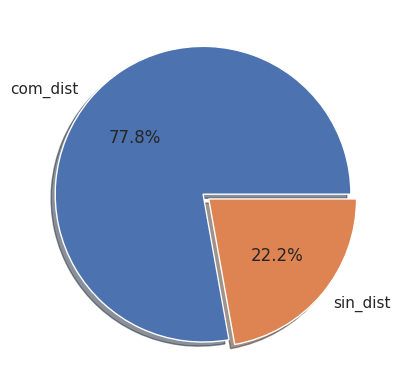

In [28]:
plt.pie(dfDist.counts, labels=dfDist.gasoduto ,  
        autopct='%1.1f%%', #colors=colors,
#         autopct= lambda p: '{} / {:.0f}%'.format(p, p * tamfilas / 100),
        shadow=True, explode=[0, 0.05])


In [33]:
fig = px.bar(dfDist, 
             x='gasoduto', 
             y='counts',
             color='gasoduto',
             text_auto='gasoduto',
             height=400,
            width= 500)
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False)
fig.show()

In [34]:
dfDadosDist.dist_gas = dfDadosDist.dist_gas.apply(lambda X: float(X))

In [35]:
dfDadosDist = dfDadosDist.sort_values(by= 'dist_gas' )
dfDadosDist['dist_gas'].head()

155056    31.405725
310016    31.405725
310019    31.405725
17251     31.405725
17254     31.405725
Name: dist_gas, dtype: float64

In [32]:
# dfDadosDist['menor500M'] = False

In [36]:
def distancia_plataforma_menor_500metros(dist):
    try:
        if float(dist) < 500.0:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['menor500M'] = dfDadosDist['dist_gas'].progress_apply(
                                        lambda x: distancia_plataforma_menor_500metros(x))

  0%|          | 0/629739 [00:00<?, ?it/s]

In [58]:
#  dfDadosDist[dfDadosDist['dist_gas'] < 500]['m<_500M'] = True

## Comprovando o filtro de distancia menor que 500

In [42]:
# os primeiros 10 menores que 500 metros 
dfDadosDist[dfDadosDist['dist_gas'] < 500][['dist_gas','menor500M']].head(8)

,dist_gas,menor500M
155056,31.405725,True
310016,31.405725,True
310019,31.405725,True
17251,31.405725,True
17254,31.405725,True
155003,31.405725,True
282017,31.405725,True
155028,31.405725,True


In [43]:
# os ultimos 10 menores que 500 metros 
dfDadosDist[dfDadosDist['dist_gas'] < 500][['dist_gas','menor500M']].tail(8)

,dist_gas,menor500M
101100,496.1586,True
101095,496.1586,True
101102,496.1586,True
96997,496.1586,True
62999,496.1586,True
79173,496.1586,True
64263,496.1586,True
101101,496.1586,True


In [44]:
dfDadosDist[dfDadosDist['dist_gas'] > 500][['dist_gas','menor500M']].tail()

,dist_gas,menor500M
143843,9.153995e+06,False
631757,9.153995e+06,False
311065,9.153995e+06,False
310825,9.153995e+06,False
347224,9.153995e+06,False


In [45]:
dadosDist05Km = dfDadosDist[dfDadosDist['menor500M'] == True].shape[0]
dadosDist05Km

20087

## Building the plot pie 

In [56]:
quantMaior500 = dfDadosDist.shape[0] - dadosDist05Km
dictDist500M = {
    'gasoduto': ["menor 500M \n n. " + str(dadosDist05Km) + ' reg', 
                 "Maior 500M \n n. " + str(quantMaior500) + ' reg'],
    'counts': [dadosDist05Km, quantMaior500]
}
dfDist500m = pd.DataFrame.from_dict(dictDist500M)
dfDist500m

,gasoduto,counts
0,menor 500M \n n. 20087 reg,20087
1,Maior 500M \n n. 609652 reg,609652


([<matplotlib.patches.Wedge at 0x7f8e22f41900>,
 [Text(1.094481666842868, 0.11004490422031014, 'menor 500M \n n. 20087 reg'),
  Text(-1.1442308429425783, -0.11504685158193807, 'Maior 500M \n n. 609652 reg')],
 [Text(0.5969900000961098, 0.06002449321107825, '3.2%'),
  Text(-0.646739172097979, -0.06502648132892151, '96.8%')])

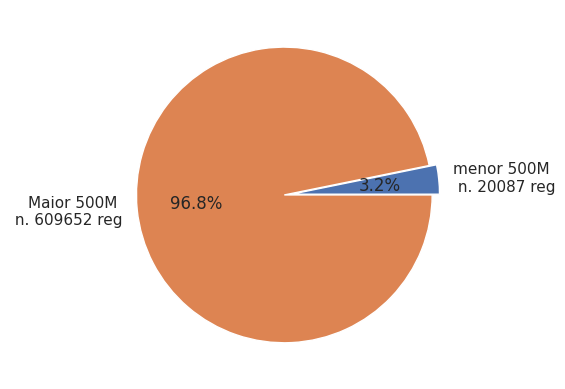

In [57]:
plt.pie(dfDist500m.counts, labels=dfDist500m.gasoduto ,  
        autopct='%1.1f%%', explode=[0, 0.05])

In [61]:
dictDist500M = {
    'gasoduto': ["menor 500M " , "Maior 500M " ],
    'counts': [dadosDist05Km, quantMaior500]
}
dfDist500m = pd.DataFrame.from_dict(dictDist500M)
dfDist500m

,gasoduto,counts
0,menor 500M,20087
1,Maior 500M,609652


In [64]:
fig2 = px.bar(dfDist500m, 
             x='gasoduto', 
             y='counts',
             color='gasoduto',
             text_auto='gasoduto',
             height=400,
            width= 500)
fig2.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False)
fig2.show()
plt.show()

In [65]:
dfDadosDist[dfDadosDist['menor500M'] == True]['SubArte'].unique()

array(['ABALO', 'MARISCAGEM', 'GAIOLA', 'LINHA DE MÃO', 'CERCO',
       'GROSEIRA', 'MERGULHO', 'ESPINHEL', 'TARRAFA', 'REDINHA',
       'SUPERFÍCIE BOIADA', 'FUNDO PEIXE', 'REÇA', 'PESQUEIRO', 'EMALHE',
       'ARRAEIRA', 'CALÃO', 'MANZUÁ', 'TAINHEIRA', 'JERERÉ',
       'FUNDO CAMARÃO', 'ARRASTO DE FUNDO OU BALOEIRO'], dtype=object)

In [66]:
numdistate500Mt = dfDadosDist[dfDadosDist['menor500M'] == True].shape[0]
numdistate500Mt

20087

## analises distancias entre 0 metros e 5 km

In [67]:
def distancia_plataforma_menor_5KM(dist):
    try:
        if float(dist) <= 5000.0:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_0_5KM'] = dfDadosDist['dist_gas'].apply(lambda x: distancia_plataforma_menor_5KM(x))

In [68]:
dfDadosDist.shape

(629739, 49)

## comprovando os resultados 

In [77]:
print("entre_0_5KM = ",dfDadosDist[dfDadosDist['entre_0_5KM'] == True].shape[0])
print("menor500M = ", dfDadosDist[dfDadosDist['menor500M'] == True].shape[0])
print("total = ", dfDadosDist[dfDadosDist['menor500M'] == True].shape[0] +
      dfDadosDist[dfDadosDist['entre_0_5KM'] == True].shape[0])

entre_0_5KM =  319817
menor500M =  20087
total =  339904


In [70]:
def distancia_plataforma_5KM(dist):
    try:
        if dist <= 5000 and dist >= 500:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_05_5KM'] = dfDadosDist['dist_gas'].progress_apply(distancia_plataforma_5KM)

  0%|          | 0/629739 [00:00<?, ?it/s]

## Comprovando o filtro de distancia entre 500 e 5000 metros 

In [71]:
dfDadosDist[['entre_05_5KM', 'dist_gas']].head(10)

,entre_05_5KM,dist_gas
155056,False,31.405725
310016,False,31.405725
310019,False,31.405725
17251,False,31.405725
17254,False,31.405725
155003,False,31.405725
282017,False,31.405725
155028,False,31.405725
161186,False,31.405725
145914,False,31.405725


In [73]:
dfDadosDist[dfDadosDist['entre_05_5KM'] == True][['dist_gas','entre_05_5KM']].head()

,dist_gas,entre_05_5KM
181040,524.509945,True
258353,524.509945,True
804652,524.509945,True
176093,524.509945,True
260557,524.509945,True


In [74]:
dfDadosDist[dfDadosDist['entre_05_5KM'] == True][['dist_gas','entre_05_5KM']].tail()

,dist_gas,entre_05_5KM
331293,4997.277982,True
331292,4997.277982,True
331291,4997.277982,True
331296,4997.277982,True
502477,4997.277982,True


### Comprovando o resultado 

In [78]:
dfDadosDist[dfDadosDist['dist_gas'] > 5000][['dist_gas','entre_05_5KM']].head()

,dist_gas,entre_05_5KM
799544,5113.420239,False
799553,5113.420239,False
757312,5113.420239,False
757304,5113.420239,False
757293,5113.420239,False


In [79]:
dfDadosDist[dfDadosDist['dist_gas'] > 5000][['dist_gas','entre_05_5KM']].tail()

,dist_gas,entre_05_5KM
143843,9.153995e+06,False
631757,9.153995e+06,False
311065,9.153995e+06,False
310825,9.153995e+06,False
347224,9.153995e+06,False


In [80]:
noDist0and5KM = dfDadosDist[dfDadosDist['entre_0_5KM'] == True].shape[0]
noDist0and5KM

319817

In [81]:
dfDadosDist[dfDadosDist['dist_gas'] > 5000].shape

(309922, 49)

In [82]:
dictDist_0a5KM = {
    'gasoduto': ['0-5KM', 'Maior 5KM'],
    'counts': [noDist0and5KM, dfDadosDist.shape[0] - noDist0and5KM]
}
dfDist_0a5KM = pd.DataFrame.from_dict(dictDist_0a5KM)
dfDist_0a5KM

,gasoduto,counts
0,0-5KM,319817
1,Maior 5KM,309922


([<matplotlib.patches.Wedge at 0x7f8e0b85eda0>,
 [Text(-0.027147111820311893, 1.0996649645777643, '0-5KM'),
  Text(0.02838107144850749, -1.1496497356949353, 'Maior 5KM')],
 [Text(-0.01480751553835194, 0.5998172534060532, '50.8%'),
  Text(0.01604147516654771, -0.6498020245232243, '49.2%')])

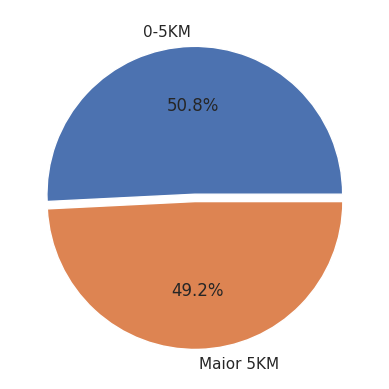

In [83]:
plt.pie(dfDist_0a5KM.counts, labels=dfDist_0a5KM.gasoduto ,  
        autopct='%1.1f%%', explode=[0, 0.05])

In [84]:
fig = px.bar(
             dfDist_0a5KM, 
             x='gasoduto', 
             y='counts',
             color='gasoduto',
             text_auto='gasoduto',
             height=400,
             width= 500
            )
fig.update_traces(
                  textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False
            )
fig.show()

In [106]:
dfDadosDist[dfDadosDist['entre_0_5KM'] == True]['SubArte'].unique()

array(['ABALO', 'MARISCAGEM', 'GAIOLA', 'LINHA DE MÃO', 'CERCO',
       'GROSEIRA', 'MERGULHO', 'ESPINHEL', 'TARRAFA', 'REDINHA',
       'SUPERFÍCIE BOIADA', 'FUNDO PEIXE', 'REÇA', 'PESQUEIRO', 'EMALHE',
       'ARRAEIRA', 'CALÃO', 'MANZUÁ', 'TAINHEIRA', 'JERERÉ',
       'FUNDO CAMARÃO', 'ARRASTO DE FUNDO OU BALOEIRO', 'Não Informado',
       'PARUZEIRA'], dtype=object)

In [86]:
def distancia_intervalo_GasodutoKM(dist):
    try:
        if dist < 1000 and dist >= 500:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_05_1KM'] = dfDadosDist['dist_gas'].progress_apply(distancia_intervalo_GasodutoKM)

  0%|          | 0/629739 [00:00<?, ?it/s]

In [87]:
dfDadosDist[dfDadosDist['entre_05_1KM'] == True].shape

(19524, 50)

In [88]:
def distancia_intervalo_GasodutoKM(dist):
    try:
        if dist < 2000 and dist >= 1000:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_1_2KM'] = dfDadosDist['dist_gas'].progress_apply(distancia_intervalo_GasodutoKM)

  0%|          | 0/629739 [00:00<?, ?it/s]

In [89]:
dfDadosDist[dfDadosDist['entre_1_2KM'] == True].shape

(83398, 51)

In [90]:
def distancia_intervalo_GasodutoKM(dist):
    try:
        if dist < 3000 and dist >= 2000:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_2_3KM'] = dfDadosDist['dist_gas'].progress_apply(distancia_intervalo_GasodutoKM)

  0%|          | 0/629739 [00:00<?, ?it/s]

In [91]:
dfDadosDist[dfDadosDist['entre_2_3KM'] == True].shape

(79262, 52)

In [92]:
def distancia_intervalo_GasodutoKM(dist):
    try:
        if dist < 4000 and dist >= 3000:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_3_4KM'] = dfDadosDist['dist_gas'].progress_apply(distancia_intervalo_GasodutoKM)

  0%|          | 0/629739 [00:00<?, ?it/s]

In [93]:
dfDadosDist[dfDadosDist['entre_3_4KM'] == True].shape

(77757, 53)

In [94]:
def distancia_intervalo_GasodutoKM(dist):
    try:
        if dist <= 5000 and dist >= 4000:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_4_5KM'] = dfDadosDist['dist_gas'].apply(distancia_intervalo_GasodutoKM)

In [95]:
dfDadosDist[dfDadosDist['entre_4_5KM'] == True].shape

(39789, 54)

### Comprovando as sumas parcials 

In [96]:
sum05_5km = dfDadosDist[dfDadosDist['entre_0_5KM'] == True].shape[0]
print("total de 0 a 5 Km", sum05_5km)
sumparcial = dfDadosDist[dfDadosDist['menor500M'] == True].shape[0]
sumparcial += dfDadosDist[dfDadosDist['entre_05_1KM'] == True].shape[0]
sumparcial += dfDadosDist[dfDadosDist['entre_1_2KM'] == True].shape[0]
sumparcial += dfDadosDist[dfDadosDist['entre_2_3KM'] == True].shape[0]
sumparcial += dfDadosDist[dfDadosDist['entre_3_4KM'] == True].shape[0]
sumparcial += dfDadosDist[dfDadosDist['entre_4_5KM'] == True].shape[0]
print("total de somas parciais ", sumparcial)

total de 0 a 5 Km 319817
total de somas parciais  319817


In [97]:
dfDadosDist.columns

Index(['Unnamed: 0', 'ID', 'Arte', 'SubArte', 'TI', 'Comunidade', 'Pesqueiro',
       'Espécie', 'Captura(kg)', 'Valor/Kg(R$)', 'Data Saída', 'Hora Saída',
       'Data Chegada', 'Hora Chegada', 'Tipo Embarc.', 'Núm. Linhas',
       'Núm. Anzóis', 'Tamanho Anzol', 'Isca', 'Espécie Alvo', 'Comp. Rede',
       'Quant. Dias Pescou Mês', 'Observação', 'Profund. Lance',
       'Houve Captura', 'Litros Combust.', 'Combustível(R$)', 'Rancho(R$)',
       'Gêlo(R$)', 'Isca(R$)', 'Venda Direta', 'Consumo', 'Peixaria,Mercado',
       'Ano', 'Mês', 'KgTotal', 'R$Total', 'CPUE kg/dia', 'Valoração',
       'Embarcação', 'corresponde', 'CoordX', 'CoordY', 'dist_gas',
       'dist_plat', 'menor_500M', 'entre_05_5KM', 'menor500M', 'entre_0_5KM',
       'entre_05_1KM', 'entre_1_2KM', 'entre_2_3KM', 'entre_3_4KM',
       'entre_4_5KM'],
      dtype='object')

In [98]:
listDist = ['dist_gas', 'menor500M','entre_05_5KM','entre_05_1KM','entre_1_2KM','entre_2_3KM',
            'entre_3_4KM','entre_4_5KM', 'entre_0_5KM']
dfDadosDist[dfDadosDist['entre_0_5KM'] == True][listDist].head(8)

,dist_gas,menor500M,entre_05_5KM,entre_05_1KM,entre_1_2KM,entre_2_3KM,entre_3_4KM,entre_4_5KM,entre_0_5KM
155056,31.405725,True,False,False,False,False,False,False,True
310016,31.405725,True,False,False,False,False,False,False,True
310019,31.405725,True,False,False,False,False,False,False,True
17251,31.405725,True,False,False,False,False,False,False,True
17254,31.405725,True,False,False,False,False,False,False,True
155003,31.405725,True,False,False,False,False,False,False,True
282017,31.405725,True,False,False,False,False,False,False,True
155028,31.405725,True,False,False,False,False,False,False,True


In [100]:
dfDadosDist[dfDadosDist['entre_0_5KM'] == True][listDist].tail(8)

,dist_gas,menor500M,entre_05_5KM,entre_05_1KM,entre_1_2KM,entre_2_3KM,entre_3_4KM,entre_4_5KM,entre_0_5KM
292951,4997.277982,False,True,False,False,False,False,True,True
331295,4997.277982,False,True,False,False,False,False,True,True
331294,4997.277982,False,True,False,False,False,False,True,True
331293,4997.277982,False,True,False,False,False,False,True,True
331292,4997.277982,False,True,False,False,False,False,True,True
331291,4997.277982,False,True,False,False,False,False,True,True
331296,4997.277982,False,True,False,False,False,False,True,True
502477,4997.277982,False,True,False,False,False,False,True,True


In [101]:
dfDadosDist.to_csv('BD/Dados_distGasoduto_CPUE_coordPequeirosValidadoUpgrade_05_08_2023.csv')

In [102]:
path_Output = 'BD/Dados_distGasoduto_CPUE_coordPequeirosValidado_Menor5KM_06_08_2023.csv'
dfDadosDist[dfDadosDist['entre_0_5KM'] == True].to_csv(path_Output)

In [103]:
dfDadosDist[dfDadosDist['entre_0_5KM'] == True].shape

(319817, 54)

In [104]:
path_Output = 'BD/Dados_distGasoduto_CPUE_coordPequeirosValidado_Menor5KM_06_08_2023.xlsx'
dfDadosDist[dfDadosDist['entre_0_5KM'] == True].to_excel(path_Output)

In [105]:
dfDadosDist.to_excel('BD/Dados_distGasoduto_CPUE_coordPequeirosValidadoUpgrade_05_08_2023.xlsx')

# Analisando os dados da Plataforma 


In [107]:
dfDadosDistP = dfRelDes.loc[pd.notnull(dfRelDes.dist_plat)]
dfDadosDistP.shape

(629793, 47)

In [108]:
dfDadosDistP = copy.deepcopy(dfDadosDistP)

In [109]:
invalid = dfDadosDistP[dfDadosDistP.dist_plat == '-'].shape[0]
invalid

0

In [110]:
dfDadosDistP.SubArte.unique()

array(['GAIOLA', 'MANZUÁ', 'JERERÉ', 'REDINHA', 'CALÃO',
       'ARRASTO DE FUNDO OU BALOEIRO', 'Não Informado', 'EMALHE',
       'PESQUEIRO', 'CERCO', 'ABALO', 'REÇA', 'ARRAEIRA', 'TAINHEIRA',
       'PARUZEIRA', 'LINHA DE MÃO', 'ESPINHEL', 'GROSEIRA', 'TARRAFA',
       'MARISCAGEM', 'MERGULHO', 'CAÇA E PESCA', 'SUPERFÍCIE BOIADA',
       'FUNDO PEIXE', 'FUNDO CAMARÃO'], dtype=object)

In [111]:
dfDadosDistP.dist_plat.sort_values()

281762    1.241591e+03
454593    1.241591e+03
464455    1.241591e+03
454591    1.241591e+03
454590    1.241591e+03
              ...     
259646    9.236734e+06
343455    9.236734e+06
28334     9.236734e+06
610927    9.236734e+06
311065    9.236734e+06
Name: dist_plat, Length: 629793, dtype: float64

In [112]:
dfDadosDistP.loc[0]

Unnamed: 0                                   0
ID                                           1
Arte                                 ARMADILHA
SubArte                                 GAIOLA
TI                                         BTS
Comunidade                Salinas da Margarida
Pesqueiro                          Duro Grande
Espécie                         Siri com casca
Captura(kg)                               17.0
Valor/Kg(R$)                               1.0
Data Saída                          17/09/2005
Hora Saída                            05:00:00
Data Chegada                        17/09/2005
Hora Chegada                          10:00:00
Tipo Embarc.                  Canoa Motorizada
Núm. Linhas                                0.0
Núm. Anzóis                                0.0
Tamanho Anzol                              NaN
Isca                                     Xangó
Espécie Alvo                     Não Informado
Comp. Rede                                 0.0
Quant. Dias P

In [113]:
dfDadosDistP.loc[:,'dist_plat'] = dfDadosDistP.loc[:,'dist_plat'].astype(float)

## Comprovando as distancias da plataforma 

In [114]:
print("dist ate 500 M = ",dfDadosDistP[(dfDadosDistP['dist_plat'] > 0 ) & (dfDadosDistP['dist_plat'] < 500.0)].shape[0])
print("dist 500 M a 1KM = ",dfDadosDistP[(dfDadosDistP['dist_plat'] >= 500. ) & (dfDadosDistP['dist_plat'] < 1000.0)].shape[0])
print("dist 1Km a 2KM = ",dfDadosDistP[(dfDadosDistP['dist_plat'] >= 1000.0 ) & (dfDadosDistP['dist_plat'] < 2000.0)].shape[0])
print("dist 2Km a 3KM = ",dfDadosDistP[(dfDadosDistP['dist_plat'] >= 2000.0) & (dfDadosDistP['dist_plat'] < 3000.0)].shape[0])
print("dist 3Km a 4KM = ",dfDadosDistP[(dfDadosDistP['dist_plat'] >= 3000.0 ) & (dfDadosDistP['dist_plat'] < 4000.0)].shape[0])
print("dist 4Km a 5KM = ",dfDadosDistP[(dfDadosDistP['dist_plat'] >= 4000.0 ) & (dfDadosDistP['dist_plat'] <= 5000.0)].shape[0])

dist ate 500 M =  0
dist 500 M a 1KM =  0
dist 1Km a 2KM =  3847
dist 2Km a 3KM =  453
dist 3Km a 4KM =  834
dist 4Km a 5KM =  818


In [115]:
df_reca = dfDadosDistP[dfDadosDistP['SubArte'] == 'REÇA']
df_reca.shape

(38164, 47)

In [116]:
# ordenar pela menor distancia 
df_reca[['SubArte','dist_plat']].sort_values(by= 'dist_plat').head()

,SubArte,dist_plat
368109,REÇA,8380.0
193032,REÇA,8380.0
193031,REÇA,8380.0
368036,REÇA,8380.0
368035,REÇA,8380.0


In [117]:
dfDadosDistP[(dfDadosDistP['SubArte'] == 'REÇA') & (dfDadosDistP['dist_plat'] <= 5000)][['SubArte','dist_plat']].head()

,SubArte,dist_plat


In [118]:
def distancia_plataforma_menor_500M(dist):
    
    if dist <= 500.0:
        return True
    else:
        return False    


dfDadosDistP['dist_0_500M_Pla'] = dfDadosDistP['dist_plat'].progress_apply(lambda x: distancia_plataforma_menor_500M(float(x)))
dfDadosDistP[dfDadosDistP['dist_0_500M_Pla'] == True].shape[0]


  0%|          | 0/629793 [00:00<?, ?it/s]

0

In [119]:
def distancia_plataforma_5KMV(dist):
    
    if dist <= 5000 and dist >= 500:
        return True
    else:
        return False    


dfDadosDistP['dist_05_5KM_Pla'] = dfDadosDistP['dist_plat'].progress_apply(lambda x: distancia_plataforma_5KMV(float(x)))

  0%|          | 0/629793 [00:00<?, ?it/s]

In [120]:
noDist0_5and5KMPla = dfDadosDistP[dfDadosDistP['dist_05_5KM_Pla'] == True].shape[0]
noDist0_5and5KMPla

5952

### Comprovançao 

In [121]:
dfDadosDistP[dfDadosDistP['dist_plat'] < 5000][['dist_plat', 'dist_05_5KM_Pla']].head()

,dist_plat,dist_05_5KM_Pla
55560,4608.770266,True
55561,4608.770266,True
77698,4608.770266,True
77699,4608.770266,True
77700,4608.770266,True


In [122]:
dfDadosDistP[dfDadosDistP['dist_plat'] > 5000][['dist_plat', 'dist_05_5KM_Pla']].head()

,dist_plat,dist_05_5KM_Pla
0,78149.886177,False
2,78149.886177,False
3,78149.886177,False
5,72582.462828,False
6,78882.649589,False


In [123]:
dfDadosDistP.shape[0] - noDist0_5and5KMPla

623841

In [124]:

dictDist_0a5KM = {
    'plataforma': ['0.5-5KM', 'Maior 5KM'],
    'counts': [noDist0_5and5KMPla, dfDadosDistP.shape[0] - noDist0_5and5KMPla]
}


In [125]:
dfDist_0a5KMP = pd.DataFrame.from_dict(dictDist_0a5KM)
dfDist_0a5KMP

,plataforma,counts
0,0.5-5KM,5952
1,Maior 5KM,623841


([<matplotlib.patches.Wedge at 0x7f53e59cbfd0>,
 [Text(1.0995152021067345, 0.032654560725680834, '0.5-5KM'),
  Text(-1.1494931668377053, -0.03413882530819743, 'Maior 5KM')],
 [Text(0.5997355647854914, 0.01781157857764409, '0.9%'),
  Text(-0.6497135290821812, -0.019295857782894197, '99.1%')])

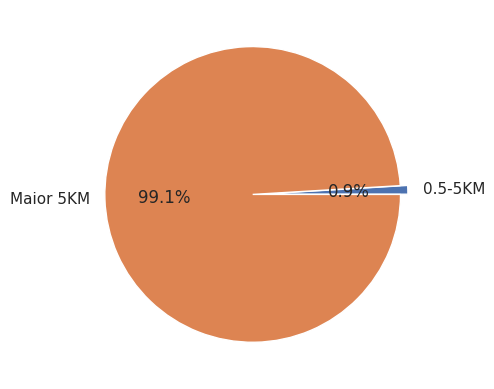

In [133]:
plt.pie(dfDist_0a5KMP.counts, labels=dfDist_0a5KMP.plataforma ,  
        autopct='%1.1f%%', explode=[0, 0.05])

In [126]:
fig = px.bar(dfDist_0a5KMP, 
             x='plataforma', 
             y='counts',
             color='plataforma',
             text_auto='Plataforma',
             height=400,
            width= 500)
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False)
fig.show()

In [127]:
def distancia_plataforma_entre_0_5KM(dist):
    
    if dist <= 5000:
        return True
    else:
        return False    


dfDadosDistP['dist_0_5KM_Pla'] = dfDadosDistP['dist_plat'].progress_apply(lambda x: distancia_plataforma_entre_0_5KM(float(x)))

  0%|          | 0/629793 [00:00<?, ?it/s]

In [128]:
noDist0_5KMPla = dfDadosDistP[dfDadosDistP['dist_0_5KM_Pla'] == True].shape[0]
noDist0_5KMPla

5952

In [129]:
dictDist_0a5KM = {
    'plataforma': ['0-5KM', 'Maior 5KM'],
    'counts': [noDist0_5KMPla, dfDadosDistP.shape[0] - noDist0_5KMPla]
}
dfDist_0a5KMP = pd.DataFrame.from_dict(dictDist_0a5KM)
dfDist_0a5KMP

,plataforma,counts
0,0-5KM,5952
1,Maior 5KM,623841


([<matplotlib.patches.Wedge at 0x7f8e0b0e0df0>,
 [Text(1.0995152021067345, 0.032654560725680834, '0-5KM'),
  Text(-1.1494931668377053, -0.03413882530819743, 'Maior 5KM')],
 [Text(0.5997355647854914, 0.01781157857764409, '0.9%'),
  Text(-0.6497135290821812, -0.019295857782894197, '99.1%')])

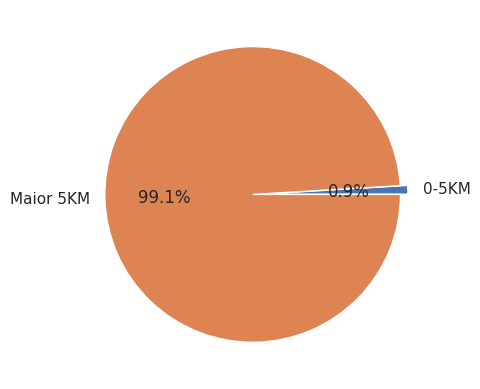

In [130]:
plt.pie(dfDist_0a5KMP.counts, labels=dfDist_0a5KMP.plataforma ,  
        autopct='%1.1f%%', explode=[0, 0.05])

## salvando os dados para distancia a Paltaforma 

In [131]:
dfDadosDistP.columns

Index(['Unnamed: 0', 'ID', 'Arte', 'SubArte', 'TI', 'Comunidade', 'Pesqueiro',
       'Espécie', 'Captura(kg)', 'Valor/Kg(R$)', 'Data Saída', 'Hora Saída',
       'Data Chegada', 'Hora Chegada', 'Tipo Embarc.', 'Núm. Linhas',
       'Núm. Anzóis', 'Tamanho Anzol', 'Isca', 'Espécie Alvo', 'Comp. Rede',
       'Quant. Dias Pescou Mês', 'Observação', 'Profund. Lance',
       'Houve Captura', 'Litros Combust.', 'Combustível(R$)', 'Rancho(R$)',
       'Gêlo(R$)', 'Isca(R$)', 'Venda Direta', 'Consumo', 'Peixaria,Mercado',
       'Ano', 'Mês', 'KgTotal', 'R$Total', 'CPUE kg/dia', 'Valoração',
       'Embarcação', 'corresponde', 'CoordX', 'CoordY', 'dist_gas',
       'dist_plat', 'menor_500M', 'entre_05_5KM', 'dist_0_500M_Pla',
       'dist_05_5KM_Pla', 'dist_0_5KM_Pla'],
      dtype='object')

In [132]:
# 'dist_05_5KM_Pla'] = dfDadosDist['dist_plat']
def distancia_intervalo_Plataforma_500_1KM(dist):
    
    if dist < 1000 and dist >= 500:
        return True
    else:
        return False
        
dfDadosDistP['dist_05_1KM_Pla'] = dfDadosDistP['dist_plat'].progress_apply(distancia_intervalo_Plataforma_500_1KM)

  0%|          | 0/629793 [00:00<?, ?it/s]

In [133]:
dfDadosDistP[dfDadosDistP['dist_05_1KM_Pla'] == True].shape

(0, 51)

In [134]:
# 'dist_05_5KM_Pla'] = dfDadosDist['dist_plat']
def distancia_intervalo_Plataforma_1_2KM(dist):
    if dist < 2000 and dist >= 1000:
        return True
    else:
        return False
    
    
dfDadosDistP['dist_1_2KM_Pla'] = dfDadosDistP['dist_plat'].progress_apply(distancia_intervalo_Plataforma_1_2KM)
dfDadosDistP[dfDadosDistP['dist_1_2KM_Pla'] == True].shape

  0%|          | 0/629793 [00:00<?, ?it/s]

(3847, 52)

In [135]:
# 'dist_05_5KM_Pla'] = dfDadosDist['dist_plat']
def distancia_intervalo_Plataforma_2_3KM(dist):
    if dist < 3000 and dist >= 2000:
        return True
    else:
        return False
   
    
dfDadosDistP['dist_2_3KM_Pla'] = dfDadosDistP['dist_plat'].progress_apply(distancia_intervalo_Plataforma_2_3KM)
dfDadosDistP[dfDadosDistP['dist_2_3KM_Pla'] == True].shape

  0%|          | 0/629793 [00:00<?, ?it/s]

(453, 53)

In [136]:
# 'dist_05_5KM_Pla'] = dfDadosDist['dist_plat']
def distancia_intervalo_Plataforma_3_4KM(dist):
    if dist < 4000.0 and dist >= 3000.0:
        return True
    else:
        return False
    
    
dfDadosDistP['dist_3_4KM_Pla'] = dfDadosDistP['dist_plat'].progress_apply(distancia_intervalo_Plataforma_3_4KM)
dfDadosDistP[dfDadosDistP['dist_3_4KM_Pla'] == True].shape

  0%|          | 0/629793 [00:00<?, ?it/s]

(834, 54)

In [137]:
# 'dist_05_5KM_Pla'] = dfDadosDist['dist_plat']
def distancia_intervalo_Plataforma_4_5KM(dist):
    if dist < 5000 and dist >= 4000:
        return True
    else:
        return False
   
    
dfDadosDistP['dist_4_5KM_Pla'] = dfDadosDistP['dist_plat'].progress_apply(distancia_intervalo_Plataforma_4_5KM)
dfDadosDistP[dfDadosDistP['dist_4_5KM_Pla'] == True].shape

  0%|          | 0/629793 [00:00<?, ?it/s]

(818, 55)

In [139]:
print('dist_05_1KM_Pla  = ' , dfDadosDistP[dfDadosDistP['dist_05_1KM_Pla'] == True].shape[0])
print('dist_1_2KM_Pla = ', dfDadosDistP[dfDadosDistP['dist_1_2KM_Pla'] == True].shape[0])
print('dist_2_3KM_Pla = ' ,dfDadosDistP[dfDadosDistP['dist_2_3KM_Pla'] == True].shape[0])
print('dist_3_4KM_Pla = ' ,dfDadosDistP[dfDadosDistP['dist_3_4KM_Pla'] == True].shape[0])
print('dist_4_5KM_Pla = ' ,dfDadosDistP[dfDadosDistP['dist_4_5KM_Pla'] == True].shape[0])


dist_05_1KM_Pla  =  0
dist_1_2KM_Pla =  3847
dist_2_3KM_Pla =  453
dist_3_4KM_Pla =  834
dist_4_5KM_Pla =  818


In [140]:
sum05_5km = dfDadosDistP[dfDadosDistP['dist_0_5KM_Pla'] == True].shape[0]
print("total de 0 a 5 Km", sum05_5km)
sumparcial = dfDadosDistP[dfDadosDistP['dist_05_1KM_Pla'] == True].shape[0]
sumparcial += dfDadosDistP[dfDadosDistP['dist_1_2KM_Pla'] == True].shape[0]
sumparcial += dfDadosDistP[dfDadosDistP['dist_2_3KM_Pla'] == True].shape[0]
sumparcial += dfDadosDistP[dfDadosDistP['dist_3_4KM_Pla'] == True].shape[0]
sumparcial += dfDadosDistP[dfDadosDistP['dist_4_5KM_Pla'] == True].shape[0]

print("total de somas parciais ", sumparcial)

total de 0 a 5 Km 5952
total de somas parciais  5952


### Verificando os dados 


In [141]:
listDist = ['dist_plat',  'dist_0_5KM_Pla','dist_05_1KM_Pla','dist_1_2KM_Pla','dist_2_3KM_Pla','dist_3_4KM_Pla',
            'dist_4_5KM_Pla', 'dist_05_5KM_Pla']
dfDadosDistP.sort_values(by= 'dist_plat')[listDist].head(12)

,dist_plat,dist_0_5KM_Pla,dist_05_1KM_Pla,dist_1_2KM_Pla,dist_2_3KM_Pla,dist_3_4KM_Pla,dist_4_5KM_Pla,dist_05_5KM_Pla
281762,1241.591282,True,False,True,False,False,False,True
454593,1241.591282,True,False,True,False,False,False,True
464455,1241.591282,True,False,True,False,False,False,True
454591,1241.591282,True,False,True,False,False,False,True
454590,1241.591282,True,False,True,False,False,False,True
449790,1241.591282,True,False,True,False,False,False,True
449789,1241.591282,True,False,True,False,False,False,True
663449,1241.591282,True,False,True,False,False,False,True
663450,1241.591282,True,False,True,False,False,False,True
276664,1241.591282,True,False,True,False,False,False,True


In [142]:
dfDadosDistP.columns

Index(['Unnamed: 0', 'ID', 'Arte', 'SubArte', 'TI', 'Comunidade', 'Pesqueiro',
       'Espécie', 'Captura(kg)', 'Valor/Kg(R$)', 'Data Saída', 'Hora Saída',
       'Data Chegada', 'Hora Chegada', 'Tipo Embarc.', 'Núm. Linhas',
       'Núm. Anzóis', 'Tamanho Anzol', 'Isca', 'Espécie Alvo', 'Comp. Rede',
       'Quant. Dias Pescou Mês', 'Observação', 'Profund. Lance',
       'Houve Captura', 'Litros Combust.', 'Combustível(R$)', 'Rancho(R$)',
       'Gêlo(R$)', 'Isca(R$)', 'Venda Direta', 'Consumo', 'Peixaria,Mercado',
       'Ano', 'Mês', 'KgTotal', 'R$Total', 'CPUE kg/dia', 'Valoração',
       'Embarcação', 'corresponde', 'CoordX', 'CoordY', 'dist_gas',
       'dist_plat', 'menor_500M', 'entre_05_5KM', 'dist_0_500M_Pla',
       'dist_05_5KM_Pla', 'dist_0_5KM_Pla', 'dist_05_1KM_Pla',
       'dist_1_2KM_Pla', 'dist_2_3KM_Pla', 'dist_3_4KM_Pla', 'dist_4_5KM_Pla'],
      dtype='object')

In [143]:
dfDadosDistP.to_csv('BD/Dados_distPLATAFORMA_CPUE_coordPequeirosValidadoUpgrade_06_08_2023.csv')

In [144]:
path_Output = 'BD/Dados_distPLATAFORMA_CPUE_coordPequeirosValidado_Menor5KM_06_08_2023.csv'
dfDadosDistP[dfDadosDistP['dist_0_5KM_Pla'] == True].to_csv(path_Output)

In [145]:
dfDadosDistP.to_excel('BD/Dados_distPLATAFORMA_CPUE_coordPequeirosValidadoUpgrade_06_08_2023.xlsx')

[18:56, 07/12/2022] Priscila Malafaia: 1. separar as subartes de pesca por categoria de distancia >500; de 500 até 1000; > que 1000 até 2000 etc, até > que 5 mil
[18:57, 07/12/2022] Priscila Malafaia: lembrar se verificar as distancias por subarte considerando o gasoduto e a plataforma
[18:59, 07/12/2022] Priscila Malafaia: 2. verificar a variação de CPUE, KG e Espécies, ao longo dos anos, para cada subarte de pesca por categoria de distância
[19:02, 07/12/2022] Priscila Malafaia: 3. Testar para cada subarte se há diferença significativa da CPUE, KG, Espécies, Renda, ao longo do tempo, entre as categorias de distancia

In [146]:
path_Output = 'BD/Dados_distPLATAFORMA_CPUE_coordPequeirosValidado_Menor5KM_06_08_2023.xlsx'
dfDadosDistP[dfDadosDistP['dist_0_5KM_Pla'] == True].to_excel(path_Output)